In [212]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [213]:
with open("../output/messages_df.pkl", "rb") as in_file:
    df = pickle.load(in_file)

## 1. Find the sender that sent more messages

In [214]:
# delete malformed messages
df = df[~df['sender'].str.contains(r'\n', regex=True)]
df = df[~df['sender'].str.contains('3.2α')]

In [215]:
all_senders = df["sender"].unique()
all_senders

array(['Carmine', 'Abame', 'Leopoldo Todisco', 'Carlo Venditto',
       'Teo Uni', 'Lucrezia', 'Stefano Amat', 'Matteo',
       'Gennaro D’Antuono Annarumma'], dtype=object)

Number of messages for each sender

In [216]:
sender_dict = {}
for sender in all_senders:
    sender_dict[sender] = len(df[df["sender"] == sender])

sender_dict

{'Carmine': 80867,
 'Abame': 79453,
 'Leopoldo Todisco': 84002,
 'Carlo Venditto': 31550,
 'Teo Uni': 4,
 'Lucrezia': 6,
 'Stefano Amat': 2530,
 'Matteo': 348,
 'Gennaro D’Antuono Annarumma': 11}

/var/folders/fx/zsdh_8412glbjpkff1h6xdlh0000gn/T/ipykernel_23014/423055818.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sender_dict.keys(), rotation=45, ha='right')


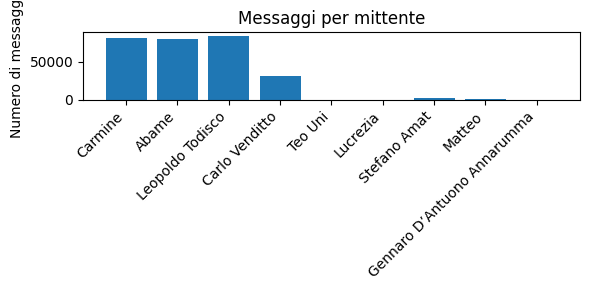

In [217]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(sender_dict.keys(), sender_dict.values())
ax.set_xticklabels(sender_dict.keys(), rotation=45, ha='right')
ax.set_ylabel("Numero di messaggi")
ax.set_title("Messaggi per mittente")
plt.tight_layout()

plt.show()

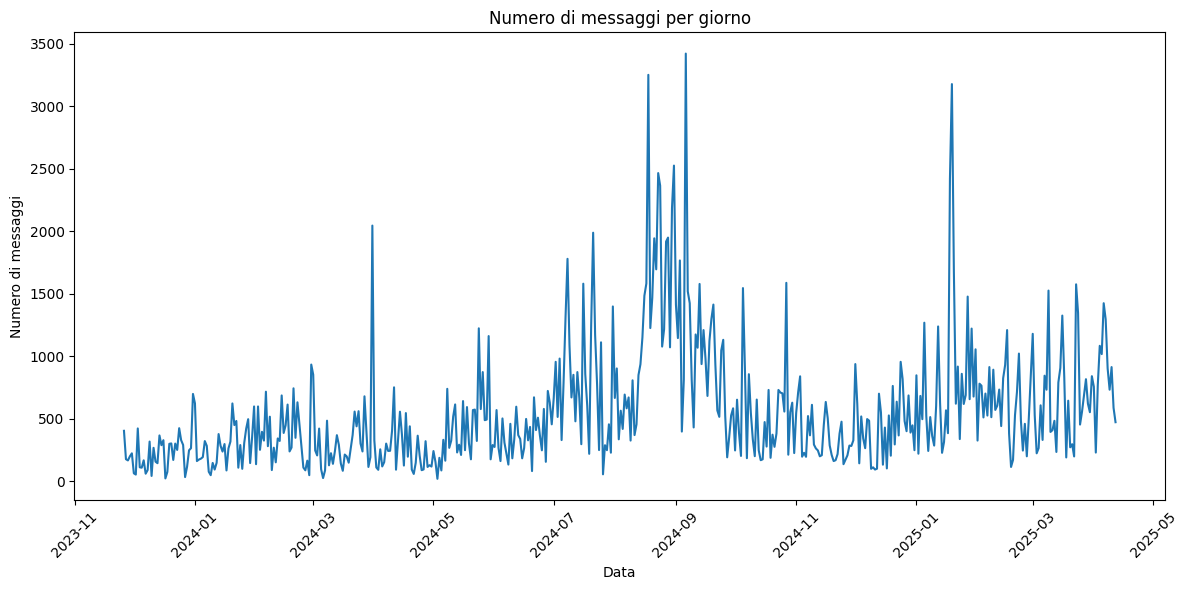

In [218]:
msg_per_day = df.groupby(df['timestamp'].dt.date).size()

plt.figure(figsize=(12, 6))
msg_per_day.plot(kind='line')
plt.title("Numero di messaggi per giorno")
plt.xlabel("Data")
plt.ylabel("Numero di messaggi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [219]:
# Day with max number of messages

max_nmessages = msg_per_day.max()
timestamp = msg_per_day[msg_per_day == max_nmessages]
timestamp

timestamp
2024-09-06    3423
dtype: int64

In [220]:
from datetime import date
# Day with min number of messages

min_n_messages = msg_per_day.min()
timestamp = msg_per_day[msg_per_day == min_n_messages]

timestamp

timestamp
2024-05-03    21
dtype: int64

In [221]:
for sender in sender_dict.keys():
    sender_messages = df[df["sender"] == sender]
    msg_per_day = sender_messages.groupby(sender_messages['timestamp'].dt.date).size()
    min_n_messages = msg_per_day.min()
    min_timestamp = msg_per_day[msg_per_day == min_n_messages]
    max_n_messages = msg_per_day.max()
    max_timestamp = msg_per_day[msg_per_day == max_n_messages]

    # print(f"""{sender} MIN = {min_timestamp} MAX = {max_timestamp}\n""")
    

In [222]:
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('italian'))

def preprocess(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # rimuove numeri
    text = re.sub(r'[^\w\s]', '', text)  # rimuove punteggiatura
    tokens = text.split()  # tokenizzazione semplice
    tokens = [word for word in tokens if word not in stop_words]  # rimuove stopwords
    return tokens

tokens_series = df['message'].dropna().apply(preprocess)
all_tokens = [token for sublist in tokens_series for token in sublist if len(token) > 3]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leopoldotodisco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [223]:
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(10)

most_common_words

[('cosa', 4507),
 ('bene', 3454),
 ('cazzo', 3345),
 ('solo', 3119),
 ('fare', 2898),
 ('carmine', 2757),
 ('però', 2730),
 ('frate', 2343),
 ('fatto', 2247),
 ('detto', 2196)]

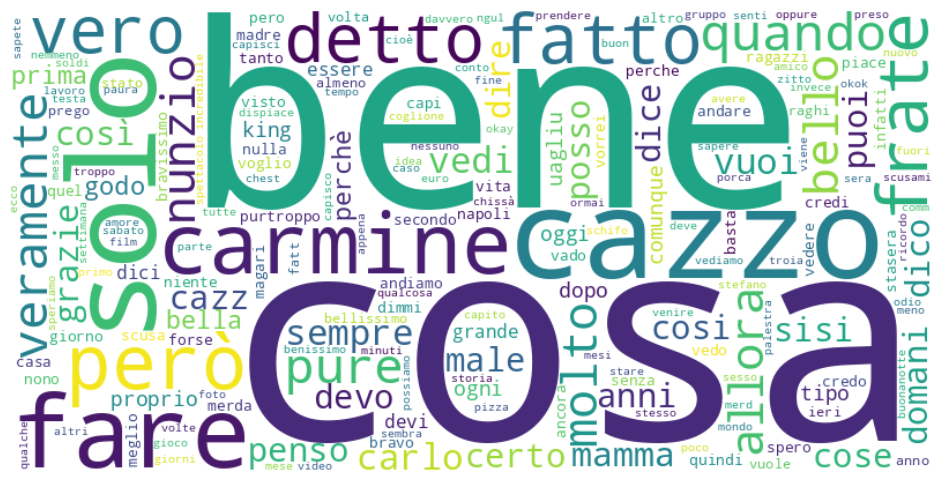

In [224]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
